# AlexNet Architecture

In [27]:
import torch
import torch.nn as nn

[Calculate SIZE of OUTPUT Tensor after Conv operations](https://fomoro.com/research/article/receptive-field-calculator#11,4,1,VALID)


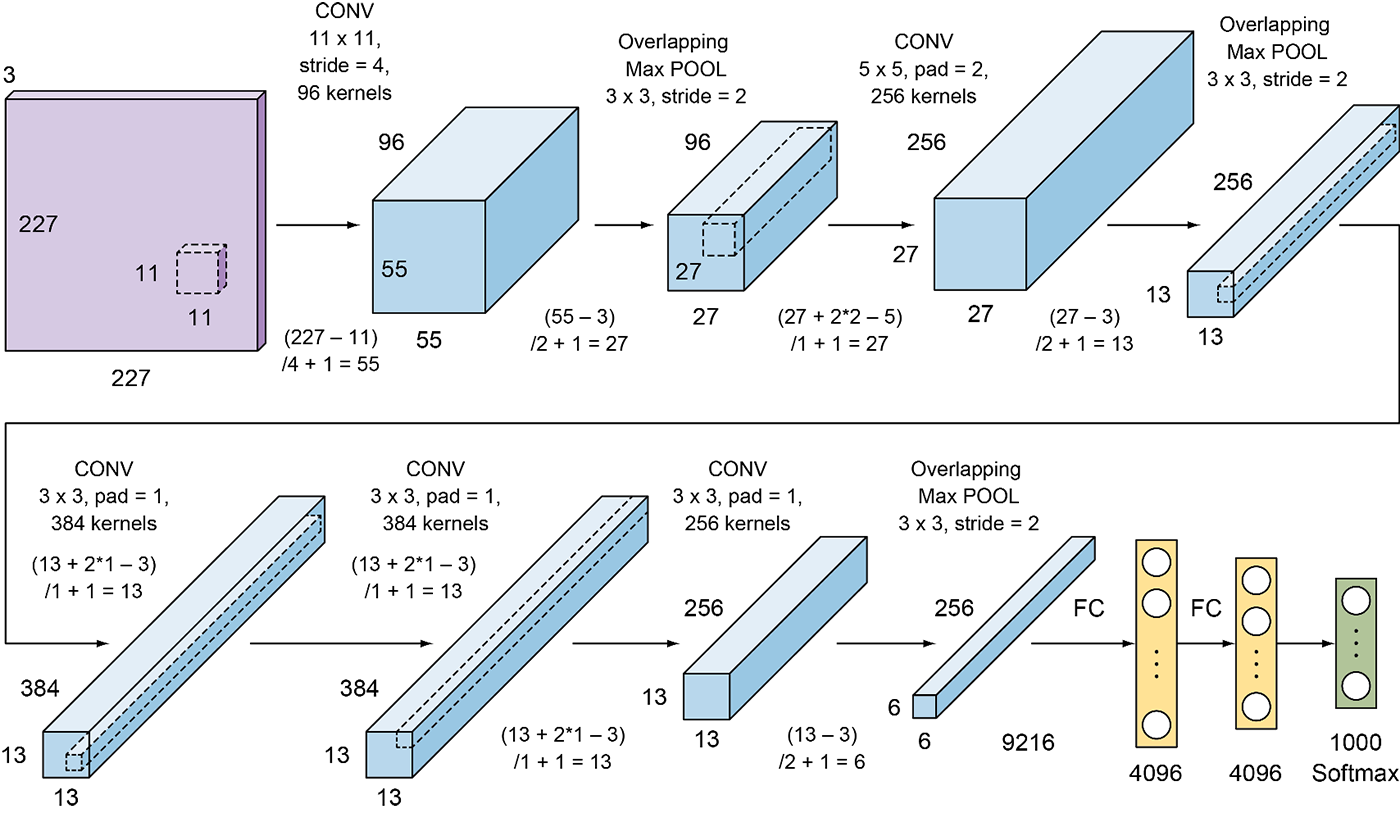

In [28]:
class Alexnet(nn.Module):
    def __init__(self, in_channels = 3, num_classes = 10):
        super(Alexnet, self).__init__()

        self.in_channels = in_channels
        
        # CONVOLUTIONAL Layers
        self.feature_extractor = nn.Sequential(
            
            # FIRST Conv Layer
            nn.Conv2d(in_channels, out_channels = 96, kernel_size = 11,
                      stride = 4), # (b x 96 x 55 x 55)
            nn.ReLU(),
            nn.LocalResponseNorm(size = 5, alpha = 0.0001, beta = 0.75, k = 2),  # Section 3.3
            nn.MaxPool2d(kernel_size = 3, stride = 2), # (b x 96 x 27 x 27)

            # SECOND Conv Layer
            nn.Conv2d(96, 256, kernel_size = 5, padding = 2), # (b x 256 x 27 x 27)
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 3, stride = 2), # (b x 256 x 13 x 13)
            nn.LocalResponseNorm(size=5, alpha=0.0001, beta=0.75, k=2),

            # THIRD Conv Layer
            nn.Conv2d(256, 384, kernel_size = 3, padding = 1), # (b x 384 x 13 x 13)
            nn.ReLU(),
            
            # FOURTH Conv Layer
            nn.Conv2d(384, 384, kernel_size=3, padding = 1), # (b x 384 x 13 x 13)
            nn.ReLU(),

            # FIFTH Conv Layer
            nn.Conv2d(384, 256, kernel_size = 3, padding = 1),  # (b x 256 x 13 x 13)
            nn.ReLU(),

            nn.MaxPool2d(kernel_size=3, stride=2),  # (b x 256 x 6 x 6)
        )

        # LINEAR Layers
        self.classifier = nn.Sequential(
            
            nn.Dropout(p=0.5, inplace = True),

            # FIRST Linear
            nn.Linear(in_features = (256 *6 *6), out_features = 4096),
            nn.ReLU(),

            nn.Dropout(p=0.5, inplace=True),

            # SECOND Linear
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),

            nn.Linear(in_features=4096, out_features=num_classes)
        )


    def forward(self, x):
      
        x = self.feature_extractor(x)
        x = x.view(-1, 256 * 6 * 6)
        return self.classifier(x)


In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = Alexnet(3, 10).to(device)
x = torch.randn(2, 3, 227, 227).to(device)

print(model(x).shape)

torch.Size([2, 10])


In [22]:
from torchsummary import summary

summary(model, (3, 227, 227))  # Channels = 3

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
              ReLU-2           [-1, 96, 55, 55]               0
 LocalResponseNorm-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
              ReLU-6          [-1, 256, 27, 27]               0
         MaxPool2d-7          [-1, 256, 13, 13]               0
 LocalResponseNorm-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,

In [32]:
model

Alexnet(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): LocalResponseNorm(5, alpha=0.0001, beta=0.75, k=2)
    (8): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=True)
    (1): Linear(in_features=9216, out_features=4096, bias=True

# Visualise the Model Architecture

In [ ]:
!pip install graphviz
!pip install torchviz

In [30]:
from graphviz import Digraph
import torch
from torch.autograd import Variable


# make_dot was moved to https://github.com/szagoruyko/pytorchviz
from torchviz import make_dot

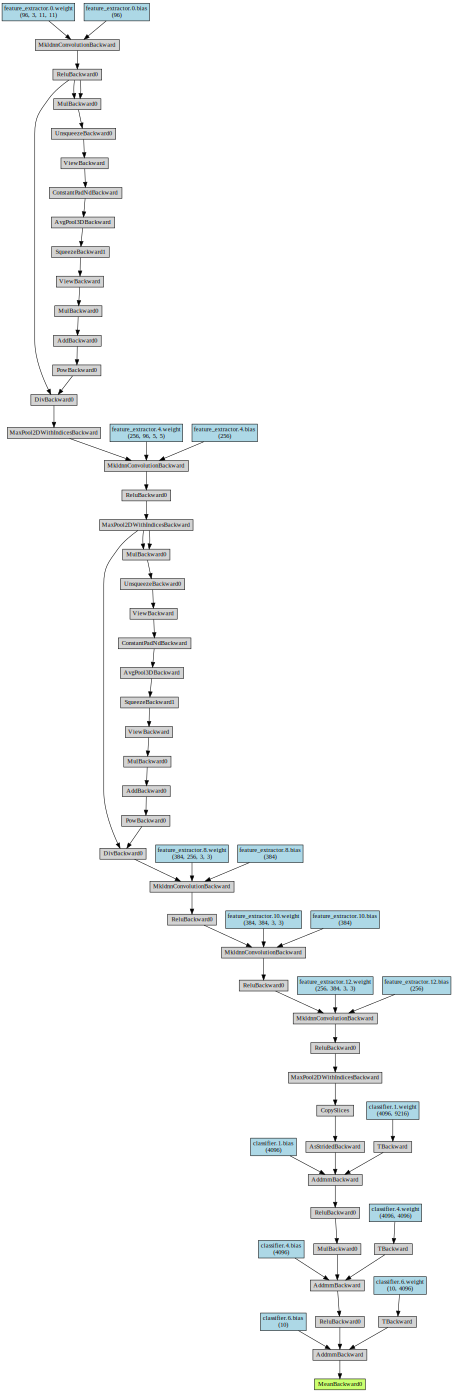

In [31]:
y = model(x)
make_dot(y.mean(), params = dict(model.named_parameters()))